## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2024-25 учебный год

## Формат сдачи

Сам ноутбук называйте в формате hw-03-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл надо будет сдать в anytask.

## О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn, а также познакомитесь с plotly.

EDA - важный этап работы с данными. Именно в процессе EDA вы можете выяснить особенности датасета, найти зависимости в данных, протестировать гипотезы о взаимосвязях признаков и целевой переменной. В реальности вы сами будете определять, что и как проверять в рамках EDA, однако в данной работе гипотезы будут выдвинуты за вас автором задания. Также и типы графиков, которые вы будете использовать уже предопределены за вас. Выполняя задания по визуализациям, обращайте внимание на референсные картинки, которые были оставлены авторами. Они показывают, какой примерно результат от вас ожидается.

Это задание будет включать в себя построение некоторого количества графиков, потому вот основные правила, в соответствии с которыми графики должны быть оформлены:
1. Любой график всегда имеет название.
2. Оси у графика подписаны (исключение - график делит название оси с соседним).
3. Подписи делаются на одном языке (либо английский, либо русский), но не на их смеси.
4. Если вы выводите несколько графиков, то они размещаются в рамках одного объекта matplotlib.pyplot.figure. Вы не выводите графики последовательно, а смотрите, как их разместить сразу все за раз.
5. Отдельные графики (если графиков на картинке больше 1) также имеют свои названия.
6. Если на графике есть несколько различных объектов, то для их различения используется легенда. Помещайте легенду в место, где она в наименьшей мере мешает восприятию самого графика.
7. Если есть легенда, то она должна иметь навание, а также ее содержание должно быть адекватными (пожалейте проверяющих, они не хотят разбирать, а к чему относится зеленая линия, которая на легенде помечена меткой "0").
8. Используйте цветовые гаммы, чтобы объекты на графиках отличались цветом.
9. Текст на визуализации должен быть читаем. Если вы вывели названия категорий в качестве подписей на оси Х, а эти названия наезжают друг на друга, то вам нужно что-то с этим сделать. Нечитаемый или плохо читаемый (очень маленький, невероятно огромный) текст ведет к снижению баллов.

При работе с табличными данными используйте функционал [style](https://pandas.pydata.org/docs/user_guide/style.html#Builtin-Styles), чтобы визуально выделять необходимые элементы.

В этом задании будут оцениваться ваши развернутые комментарии, размышления и выводы (по построенным графикам): не скупитесь на них, но следите, чтобы выводы не были поверхностными и очевидными.

*Тут правило про плагиат, которое вам итак известно - обнуляются все работы, которые подозреваются в некорректных заимствованиях!* Помните, что просто скопировать код из интернета и указать источник - это не ваша самостоятельная работа, а автора кода. Измените хоть что-нибудь в коде.

## О данных

Будем работать с [датасетом физической активности](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones).

В этом датасете собраны данные 30 человек, выполняющих различные действия со смартфоном на поясе. Данные записывались с помощью датчиков (акселерометра и гироскопа) в этом смартфоне. Были зафиксированы: "3-осевое линейное ускорение" (_tAcc-XYZ_) и "3-осевая угловая скорость" (_tGyro-XYZ_).

1. Все сигналы отсортированы по времени, пропущены через фильтр шума.
2. Все наблюдения были разделены на окна по 128 сигналов в каждом, причем окна пересекаются на 50% (грубо говоря, с 1 по 128 сигнал в 1 окно, с 64 до 192 сигнала - во 2 окно и так далее). То есть каждое окно покрывает 2.56 секунды данных (два шага человека при ходьбе, учитывая медленную походку пожилых людей).
3. Линейное ускорение было разделено на две составляющие (с помощью низкочастотного фильтра): ускорение самого тела, а также гравитационная составляющая. Будем называть их ускорением тела и гравитационным ускорением.
4. К получившимся окнам применяли различные функции для получения следующих показателей:
    - max
    - min
    - mad (median)
    - mean
    - std
    - skewness (коэффициент асимметричности распределения признака в окне)
    - etc. (подробнее, на сколько это возможно, указано в [самой статье](https://www.esann.org/sites/default/files/proceedings/legacy/es2013-84.pdf))
5. Величина (magnitude) сигнала также определялась через евклидову норму всех значений из вектора для одного окна.
6. К окнам было применено преобразование Фурье, чтобы получить частоты. Из частот были извелченыте же показатели, плюс новые:
    - bandsEnergy (энергия частотного интервала)
7. Были посчитаны углы между векторами соответствующих окон.
8. Для ускорений были посчитаны производные - рывки, к которым применялись те же функции.

Итог: в датасете каждый признак - это какая-то операция над вектором из 128 чисел, которые соответствуют замерам определенного человека занятого какой-то активностью на протяжении 2.56 секунд.

Как читать названия признаков? Примеры:
- `tBodyAccMag-mean()` - это вектор ускорений тела (без гравитационной составляющей этого ускорения), из которого взяли евклидову норму, а затем усреднили, чтобы получить скаляр
- `fBodyAcc-bandsEnergy()-1,8.2` - это вектор ускорения тела, к которому применили преобразование Фурье, преобразовав его в вектор частот, а затем посчитали на этом векторе энергию данного частотного интервала в определенном диапазоне частот (в данном случае 1 - 8.2)
- `angle(X,gravityMean)` - это угол между осью Х и вектором усредненных значений гравитационного ускорения из соответствующего окна

Вероятно, сначала покажется сложным, но мы разберемся с некоторыми признаками в отдельности и вы сможете понять их смысл, уже исходя из фактических соотношений.

## Предобработка данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8-whitegrid")

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [4]:
train.shape

(7352, 563)

В датасете 563 признака, включая целевую переменную. Столько признаков нам не нужно. Мы за вас сделали подвыборку признаков для удобства работы с ними.

In [5]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

In [6]:
train = train[cols_subset]
test = test[cols_subset]

### Задание 1 (0.5 балла)

Посмотрите на пропуски и дубли в данных train и test. Есть ли они? Если есть, напишите, с чем это может быть связано? Если нет, то просто напишите, что пропусков и/или дублей нет.

In [7]:
# ٩(◕‿◕｡)۶ your code here
print(f"Пропуски данных на трейне: {train.isnull().sum().sum()}")
print(f"Пропуски данных на тесте: {test.isnull().sum().sum()}")
print(f"Количество дубликатов на трейне: {train.duplicated().sum()}")
print(f"Количество дубликатов на тесте: {test.duplicated().sum()}")

Пропуски данных на трейне: 0
Пропуски данных на тесте: 0
Количество дубликатов на трейне: 0
Количество дубликатов на тесте: 0


Дубликатов и пропусков нет

### Задание 2 (0.5 балла)

Выведите основные статистики данных: среднее, медиана, перцентили (0.25, 0.5, 0.75), минимум, максимум, стандартное отклонение. Посмотрите на таблицу и напишите, видите ли вы в ней что-нибудь интересное.

In [8]:
# (ノಠ益ಠ)ノ彡 your code here
train.describe()


,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,-0.543884,-0.727735,0.678505,-0.468604,-0.847963,-0.489547,0.058593,-0.056515,-0.128562,17.413085
std,0.477653,0.315832,0.508656,0.544547,0.233633,0.511807,0.297480,0.279122,0.403686,8.975143
min,-1.000000,-0.999889,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.931208,1.000000
25%,-0.983282,-0.991595,0.804270,-0.936219,-0.999480,-0.812065,-0.017885,-0.143414,-0.486841,8.000000
50%,-0.883371,-0.950268,0.926693,-0.881637,-0.986582,-0.709417,0.182071,0.003181,-0.163271,19.000000
75%,-0.106892,-0.474625,0.965095,-0.017129,-0.764508,-0.509079,0.248353,0.107659,0.155112,26.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.478157,1.000000,1.000000,30.000000


In [9]:
test.describe()

,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,-0.559043,-0.735661,0.696878,-0.462063,-0.880361,-0.513923,0.074886,-0.048720,-0.154042,12.986427
std,0.439539,0.282074,0.502873,0.523916,0.160496,0.509205,0.324300,0.241467,0.392203,6.950984
min,-0.998936,-1.000000,-0.756774,-0.952357,-0.999989,-0.984195,-0.913704,-0.949228,-1.000000,2.000000
25%,-0.978433,-0.989078,0.836787,-0.934447,-0.999330,-0.829722,0.022140,-0.098485,-0.497070,9.000000
50%,-0.861830,-0.914698,0.934930,-0.852659,-0.979336,-0.729648,0.181563,-0.010671,-0.202050,12.000000
75%,-0.149596,-0.486423,0.970871,-0.009965,-0.799113,-0.545939,0.260252,0.092373,0.140254,18.000000
max,0.479547,0.117606,0.996148,0.786436,0.048730,0.833180,1.000000,0.973113,0.960367,24.000000


Видим, что все признаки, кроме `subject` отмасштабированы и лежат в диапозоне от -1 до 1.
Заметим, что среднее по `subject` не равно половине от всех испытуемых, значит скорее всего о каждом человеке известно разное количество информации.

### Задание 3 (0.5 балла)

Данные сбалансированы? У вас есть 6 категорий активности (целевая переменная). Если одна из категорий представлена большим количеством наблюдений, а остальные - нет, то это обстоятельство, о котором хотелось бы знать заранее. Гиперболизированный пример: представьте, что у вас 1000 наблюдений, разделенных на два класса, и только 5 принадлежат ко второму классу. Как учить модель на такой выборке? Есть сильное подозрение, что многие модели будут склонны вырождаться в константу. Отсюда и необходимость проверять баланс классов.

Выведите количество наблюдений для всех категорий активности в train и test. Посчитайте разницу в процентах между самой крупной категорией и самой маленькой (самая большая категория - это 100%). Если разница (округленная до ближайшего целого числа) не превышает 30%, то давайте для наших целей считать, что данные сбалансированы. Напишите, сбалансированы ли данные в train и test.

In [10]:
# ‿( ́ ̵ _-`)‿ your code here
activity_train = train.groupby('Activity').size()
activity_train


Activity
LAYING                1407
SITTING               1286
STANDING              1374
WALKING               1226
WALKING_DOWNSTAIRS     986
WALKING_UPSTAIRS      1073
dtype: int64

In [11]:
activity_test = test.groupby('Activity').size()
activity_test

Activity
LAYING                537
SITTING               491
STANDING              532
WALKING               496
WALKING_DOWNSTAIRS    420
WALKING_UPSTAIRS      471
dtype: int64

In [12]:
max_activity_train = activity_train.idxmax()
min_activity_train = activity_train.idxmin()
max_activity_test = activity_test.idxmax()
min_activity_test = activity_test.idxmin()
diff_train = activity_train[max_activity_train] - activity_train[min_activity_train]
diff_test = activity_test[max_activity_test] - activity_test[min_activity_test]
print(f"Разница в активности (трейн): {diff_train/activity_train[max_activity_train]}")
print(f"Разница в активности (тест): {diff_test/activity_test[max_activity_test]}")

Разница в активности (трейн): 0.2992181947405828
Разница в активности (тест): 0.21787709497206703


Ура, проходим порог в 30 процентов на трейне и тесте, значит говорим, что данные сбалансированные.

### Задание 4 (0.5 балла)

Посчитайте корреляции всех признаков (включая таргет) со всеми другими. Какими получились значения? Есть идеи, почему так? Напишите ваши мысли.

In [13]:
# ( ͡° ͜ʖ ͡°) your code here
train.corr(numeric_only=True)

,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,subject
tBodyAccMag-mean(),1.000000,0.899080,0.369962,0.959827,0.697832,-0.370849,0.495561,0.426283,0.379796,-0.073652
tBodyGyroJerk-mad()-X,0.899080,1.000000,0.380118,0.879900,0.507939,-0.382246,0.478567,0.380967,0.266002,-0.110321
tGravityAcc-min()-X,0.369962,0.380118,1.000000,0.380404,0.239088,-0.988663,0.797116,0.667415,-0.261676,-0.042371
tBodyAcc-max()-X,0.959827,0.879900,0.380404,1.000000,0.613383,-0.384192,0.480229,0.405023,0.335708,-0.055633
"fBodyAcc-bandsEnergy()-1,8.2",0.697832,0.507939,0.239088,0.613383,1.000000,-0.213318,0.363170,0.423927,0.260316,-0.037000
"angle(X,gravityMean)",-0.370849,-0.382246,-0.988663,-0.384192,-0.213318,1.000000,-0.783848,-0.643655,0.265523,0.026137
"angle(Y,gravityMean)",0.495561,0.478567,0.797116,0.480229,0.363170,-0.783848,1.000000,0.594885,-0.046213,-0.009829
"angle(Z,gravityMean)",0.426283,0.380967,0.667415,0.405023,0.423927,-0.643655,0.594885,1.000000,-0.183815,-0.098712
fBodyAcc-skewness()-X,0.379796,0.266002,-0.261676,0.335708,0.260316,0.265523,-0.046213,-0.183815,1.000000,0.019742
subject,-0.073652,-0.110321,-0.042371,-0.055633,-0.037000,0.026137,-0.009829,-0.098712,0.019742,1.000000


<Axes: >

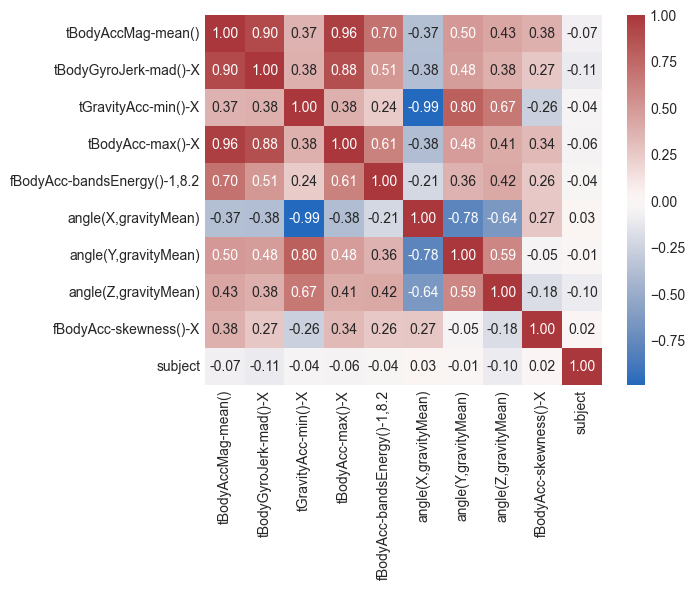

In [14]:
sns.heatmap(train.corr(numeric_only=True), annot=True, fmt="0.2f", cmap="vlag")

Посмотрим на данные и увидим, что некоторые признаки имеют сильную корреляцию, линейную зависимость. Можно предположить, что это так, поскольку информация, которую содержит один признак, частично уже содержится и в другом признаке. Например, это можно заметить с признаками `tBodyAccMag-mean()` и `tBodyAcc-max()-X`. 

Поздравляем! Вы предобработали данные для максимально комфортного их последующего анализа. Теперь вы готовы приступить к Exploratory Data Analysis!

## Exploratory Data Analysis

### Задание 5 (0.5 балла)

Вы проверили основную информацию о данных и составили свое первое впечатление о них. Теперь визуализации.

Начнем рисовать графики с небольшой разминки. Выберите две любые математические функции (отличные от линейной) и нарисуйте их на одном графике. Подпишите каждый из графиков, чтобы было понятно, какие функции вы выбрали. Ниже будет пример.

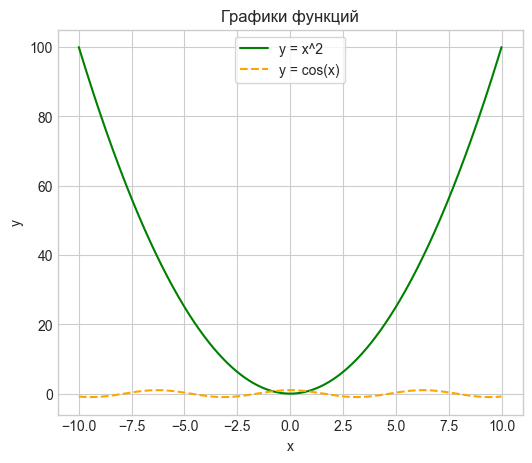

In [15]:
# (◕‿◕)♡ your code here
x = np.linspace(-10, 10, 100000)
y1 = x**2
y2 = np.cos(x)

plt.figure(figsize=(6, 5))
plt.title('Графики функций')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y1, label='x^2', color='g')
plt.plot(x, y2, label='cos(x)', color='orange', linestyle='--')
plt.legend(labels=['y = x^2', 'y = cos(x)'], loc='upper center', frameon=True)
plt.show()

### Задание 6 (0.5 балла)

Ранее мы уже проверили сбалансированность данных по разным категориям активностей в train и test сетах. Теперь визуализируйте количество сэмплов в каждой из категорий отдельно для train и test сетов, как в примере ниже. Проследите, чтобы порядок категорий слева и справа был одинаков. Иначе не очень удобно их сравнивать (когда они в разных местах двух графиков). Также заметьте, что в примере ось Х в одинаковом масштабе, что тоже удобно для сравнения.

Вам может пригодиться:
- plt.barh или ax.barh

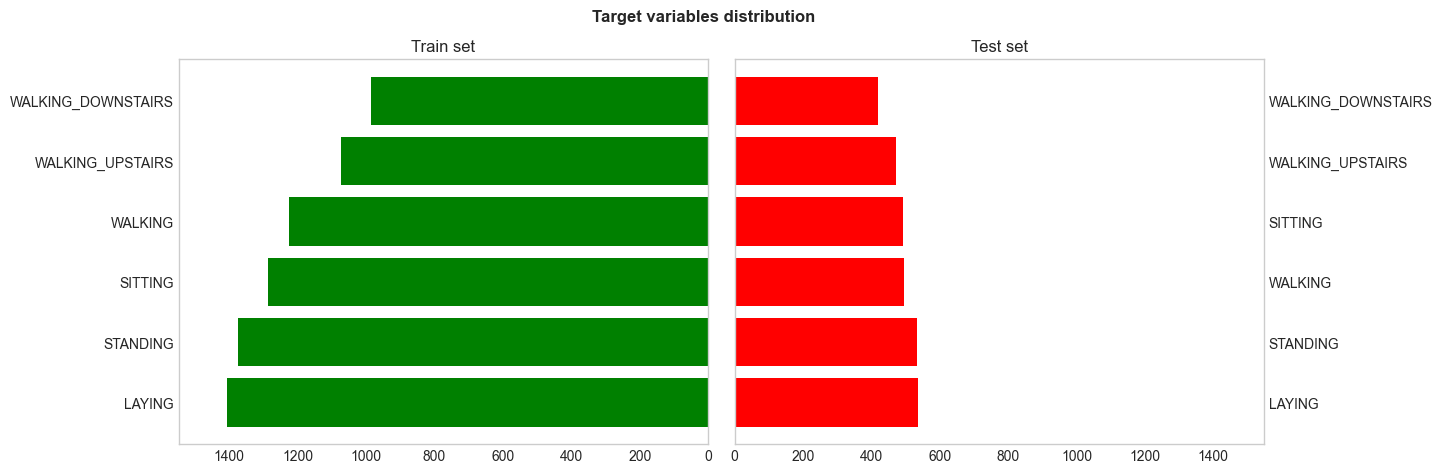

In [16]:
# ̿' ̿'\̵͇̿̿\з=( ͡ °_̯͡° )=ε/̵͇̿̿/'̿'̿ ̿ your code here

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), gridspec_kw={'wspace': 0.05})
fig.suptitle('Target variables distribution', fontweight='bold')
ax1.barh(activity_train.sort_values(ascending=False).index, activity_train.sort_values(ascending=False).values, color='g')
ax1.set_title('Train set')
ax1.grid(False)

ax2.barh(activity_test.sort_values(ascending=False).index, activity_test.sort_values(ascending=False).values, color='r')
ax2.set_title('Test set')
ax2.yaxis.set_label_position("right")
ax2.yaxis.set_ticks_position("right")
ax2.grid(False)

max_val = max(activity_train.max(), activity_test.max())
ax1.set_xlim(0, max_val * 1.1)
ax2.set_xlim(0, max_val * 1.1)
ax1.invert_xaxis()

Правда на таких графиках проще проверять баланс классов таргета?)

### Задание 7 (0.5 балла)

Ранее вы выводили таблицу корреляций. Однако просто таблица корреляций не очень удобна для анализа. Что, если признаков было бы больше? Визуализируйте heatmap корреляций. Подпишите значения корреляций, округленные до 2 знаков после запятой, на графике и оставьте только те значения, которые по модулю не меньше 0.5. Будем считать такие корреляции существенными. Если будете брать код из семинарского ноутбука, то поменяйте в нем что-нибудь, например, цветовую гамму, иначе проверяющий будет карать :)

Какой признак стоит исключить из рассмотрения корреляций? Напишите его название, а также причину, почему нет смысла его рассматривать.

Вам может пригодиться:
- sns.heatmap
- методы get_text и set_text у атрибута texts графика

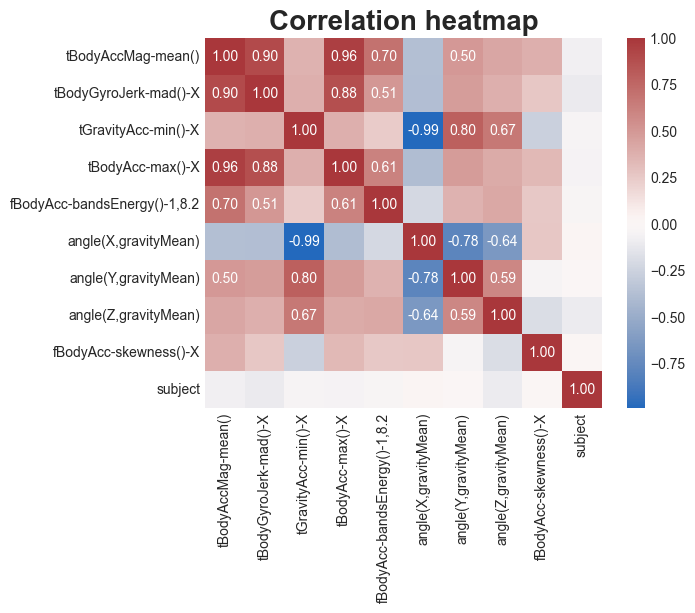

In [17]:
# ღゝ◡╹)ノ♡ your code here
ax = sns.heatmap(train.corr(numeric_only=True), annot=True, fmt="0.2f", cmap="vlag")
for i in ax.texts:
    if float(i.get_text()) >= 0.5 or float(i.get_text()) <= -0.5:
        i.set_text(i.get_text())
    else:
        i.set_text("")

ax.set_title("Correlation heatmap", size=20, weight="heavy");

Исключить нужно признак `subject`, потому что у него корреляции с другими признака почти нулевая, и сам номер объекта почти ничего не говорит о самом объекте. Если, считать числовые признаки, но также стоит исключить `Activity`, тк он категориальный.

### Задание 8 (0.5 балла)

Для начала будем стрелять из пушки по воробьям. Выведите pairplot по всем данным train сета. Напишите, заметили ли вы в нем что-нибудь интересное, чего не было в таблицах и графиках ранее, а также сообщите, было ли вам удобно анализировать 100 графиков.

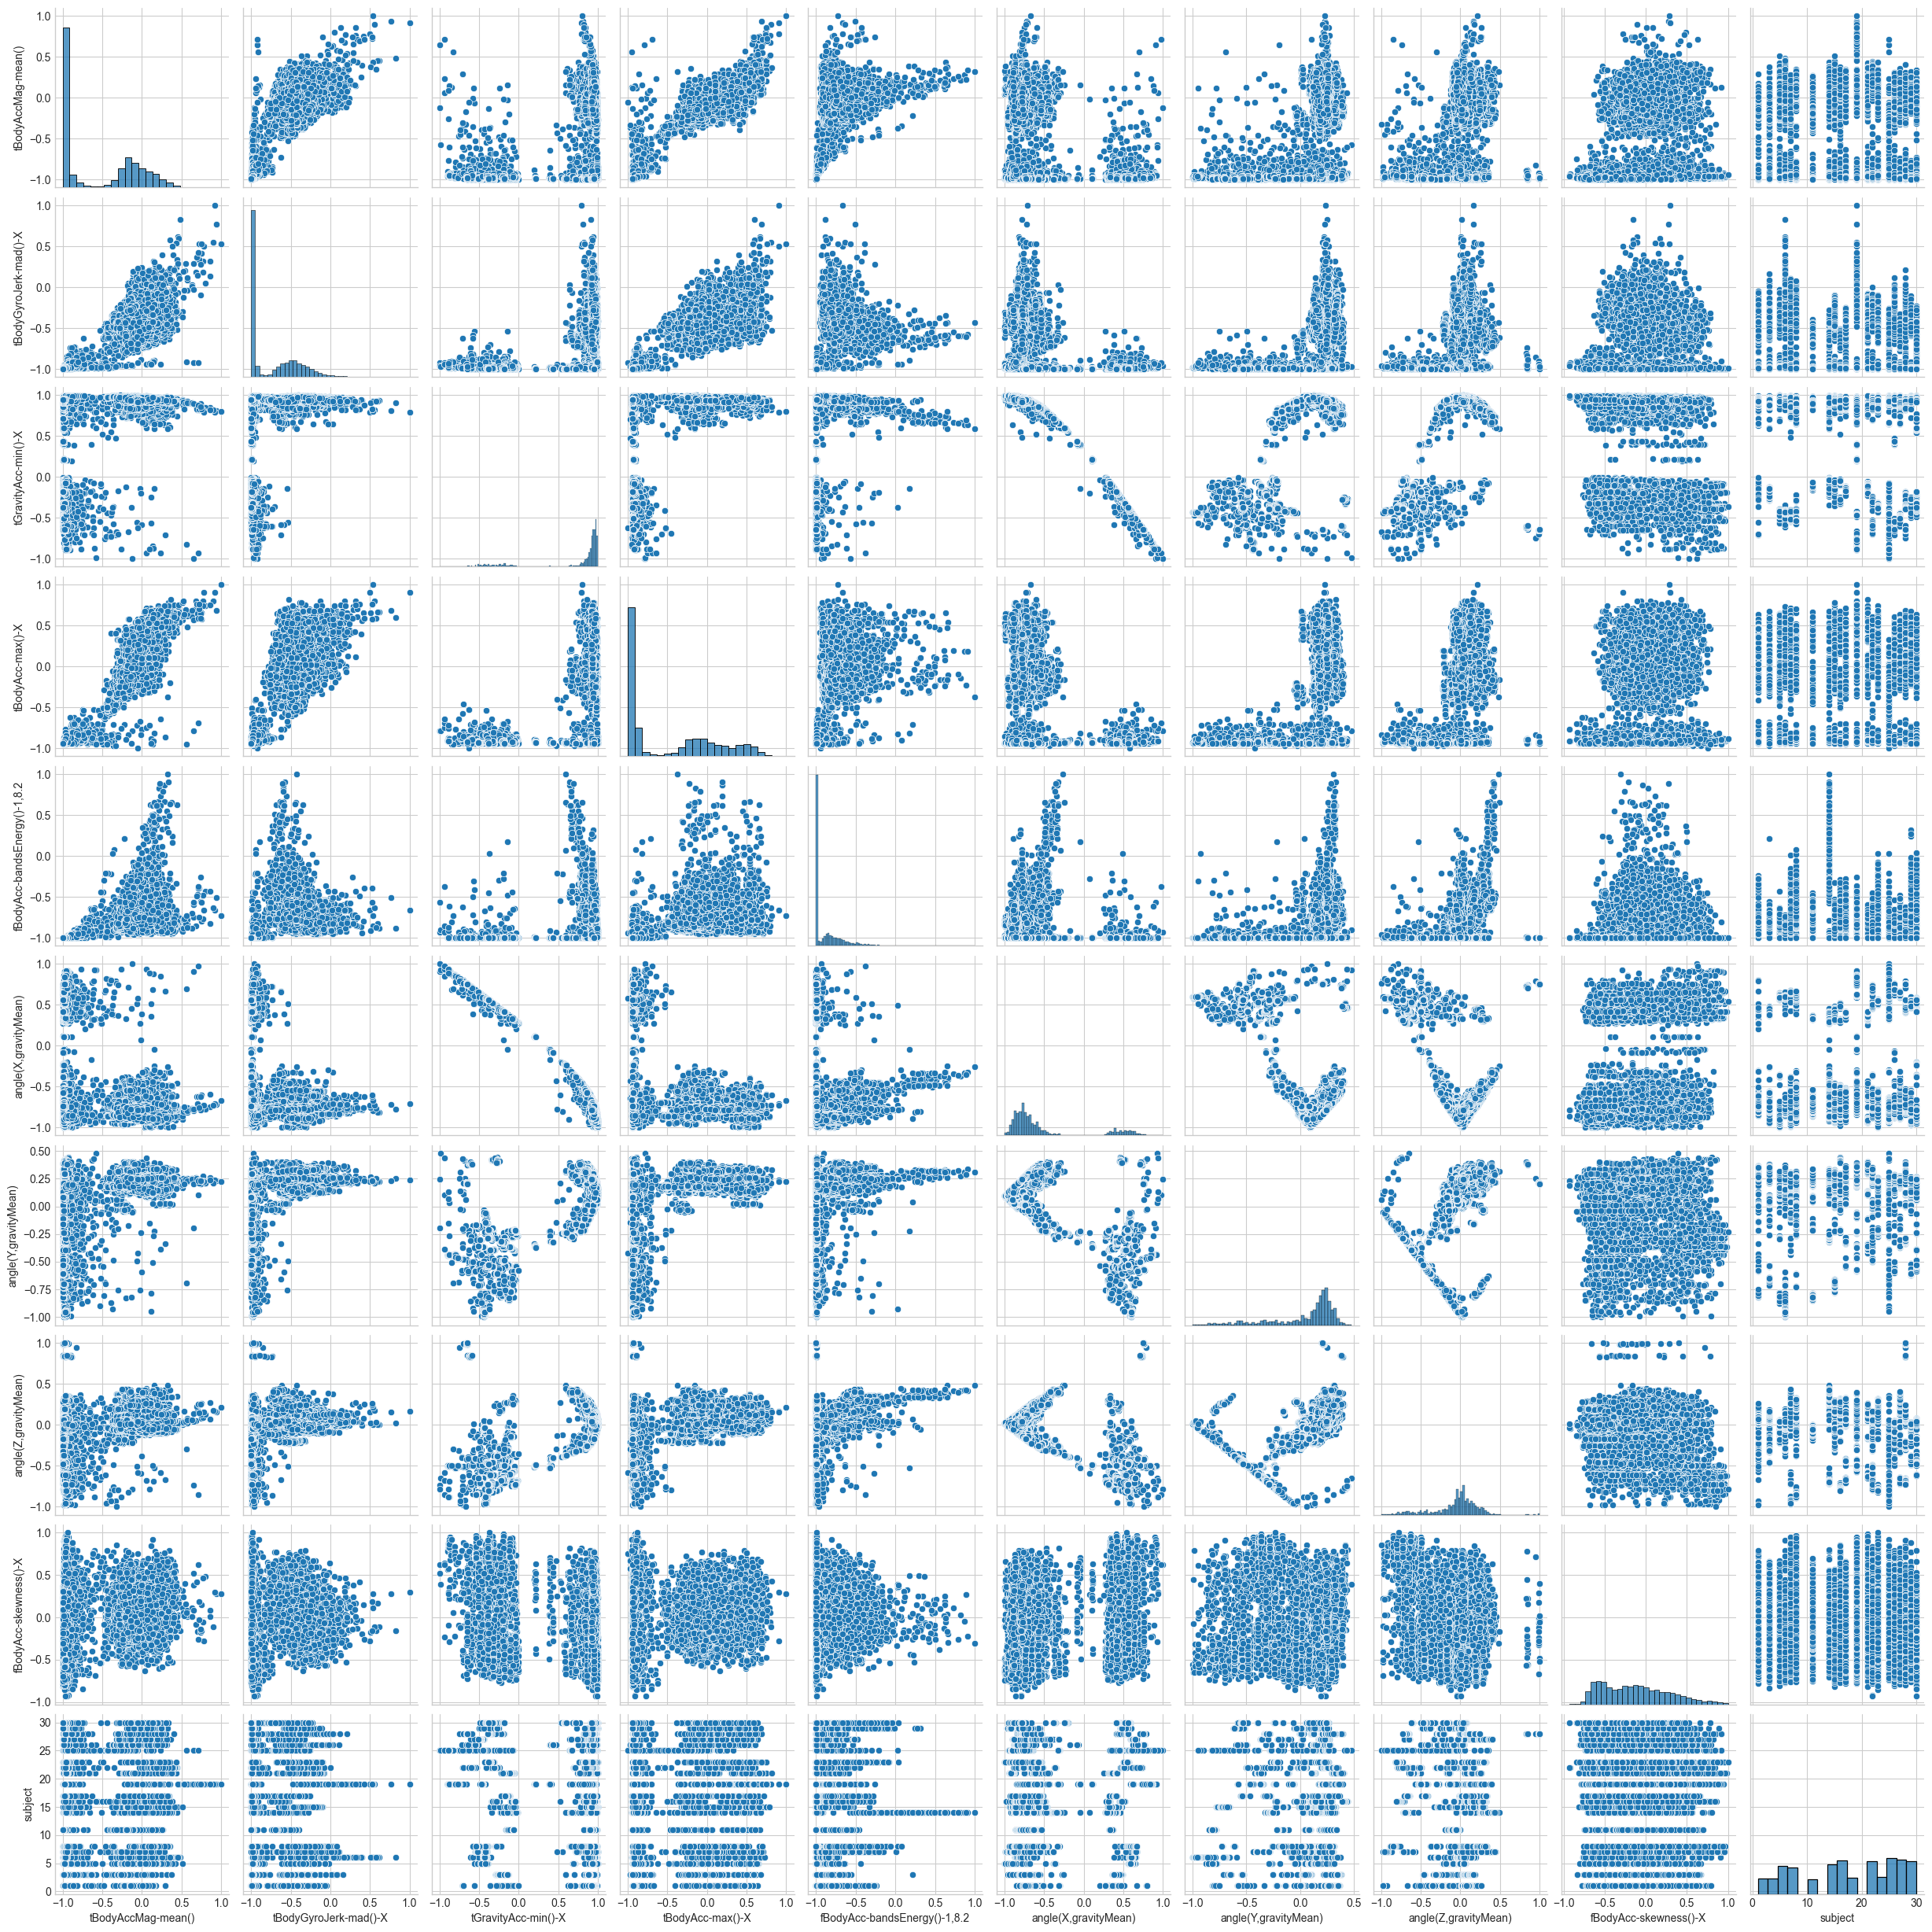

In [18]:
# ♪ヽ( ⌒o⌒)人(⌒-⌒ )v ♪ your code here
sns.pairplot(train)

Сразу же бросается в глаза линейная зависимость признаков `angle(X,gravityMean)` и `tGravityAcc-min()-X`, что в целом не удивительно, так как они имеют очень высокую корреляцию. Более того, подобные замечания про линейность можно отнести и к другим признакам, у которых корреляция по модулю большая.

Из приятных бонусов: можно посмотреть распределение конкретных признаков (на диагонали матрицы из графиков), ранее эта информация была отражена только в начальной таблице со стандартными распределениями, средними значениями и т.д.

Чего-то принципиально нового на этих графиках рассмотреть не получается из-за слишком большого их количества, маленького размера и прочих неудобств `pairplot`.

### Задание 9 (1 балл)

Окей. Смотреть на все сразу не очень удобно. Кажется, нужно смотреть на признаки в отдельности и искать в них инсайты.

Попробуем проверить гипотезу. Отобразите плотность распределения (kde) `tBodyAccMag-mean()` для каждой из активностей, как в примере ниже. Видите закономерность? Можно ли поделить все активности на две группы? Если да, то проведите вертикальную линию, которая визуально неплохо разделяет эти группы.

Давайте первую группу называть статическими активностями, а вторую - динамическими.

Посчитайте, какую долю правильных ответов дает ваша вертикальная линия для разделения именно этих двух групп. С чем может быть связан полученный вами результат? Предположите логическое обоснование (почему именно данный признак так хорошо/плохо разделяет группы активностей).

Вам может пригодиться:
- sns.kdeplot

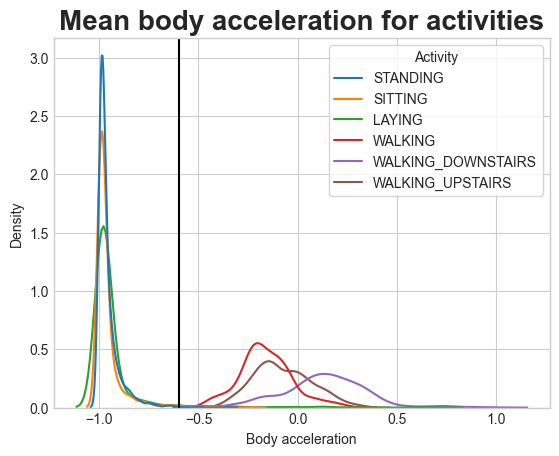

In [19]:
# ʅ(◔౪◔ ) ʃ your code here
ax = sns.kdeplot(train, x='tBodyAccMag-mean()', hue='Activity', fill=False)
ax.set_xlabel("Body acceleration")
ax.set_title("Mean body acceleration for activities", size=20, weight="heavy")
ax.get_legend().set_frame_on(True)

ax.axvline(-0.6, c="black");

In [20]:
train_copy = train.copy()
train_copy['ActivityType'] = train_copy['Activity'].map({"LAYING": "Static",
                                                       "STANDING": "Static",
                                                       "WALKING": "Dynamic",
                                                       "SITTING": "Static",
                                                       "WALKING_UPSTAIRS": "Dynamic",
                                                       "WALKING_DOWNSTAIRS": "Dynamic"})
train_copy.head()

,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,subject,Activity,ActivityType
0,-0.959434,-0.992165,0.977436,-0.934724,-0.993592,-0.841247,0.179941,-0.058627,0.142051,1,STANDING,Static
1,-0.979289,-0.989876,0.984520,-0.943068,-0.998235,-0.844788,0.180289,-0.054317,-0.692541,1,STANDING,Static
2,-0.983703,-0.987868,0.986770,-0.938692,-0.999388,-0.848933,0.180637,-0.049118,-0.727227,1,STANDING,Static
3,-0.986542,-0.991241,0.986821,-0.938692,-0.999807,-0.848649,0.181935,-0.047663,-0.599118,1,STANDING,Static
4,-0.992827,-0.992882,0.987434,-0.942469,-0.999806,-0.847865,0.185151,-0.043892,-0.676997,1,STANDING,Static


In [21]:
train_copy["PredActivityType"] = train_copy["PredActivityType"] = pd.cut(
    train_copy['tBodyAccMag-mean()'], 
    bins=[-np.inf, -0.6, np.inf], 
    labels=['Static', 'Dynamic']
)
train_copy.sample(10)

,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,subject,Activity,ActivityType,PredActivityType
211,-0.997794,-0.998167,0.809545,-0.941146,-0.999929,-0.510716,-0.137470,-0.228499,-0.368147,1,SITTING,Static,Static
4560,-0.974665,-0.974800,0.969795,-0.942968,-0.999418,-0.777564,0.251346,0.030869,-0.571784,22,STANDING,Static,Static
5411,-0.367293,-0.499040,0.979923,-0.469536,-0.848937,-0.862114,0.178407,-0.036013,0.209386,25,WALKING,Dynamic,Dynamic
5068,-0.986977,-0.981348,0.924412,-0.941303,-0.999576,-0.667613,0.199366,-0.196007,-0.536822,25,STANDING,Static,Static
5188,-0.486434,-0.612874,0.929024,-0.611522,-0.775555,-0.696424,0.169862,-0.187611,-0.365729,25,WALKING,Dynamic,Dynamic
2940,-0.985049,-0.988176,-0.038889,-0.931161,-0.999583,0.303857,-0.220559,-0.729351,0.037527,16,LAYING,Static,Static
3952,-0.182086,-0.424584,0.789339,-0.158697,-0.834432,-0.461503,0.354986,0.284688,0.261127,19,WALKING_UPSTAIRS,Dynamic,Dynamic
5201,-0.413019,-0.476793,0.923031,-0.568898,-0.888174,-0.697990,0.148990,-0.193615,0.295414,25,WALKING,Dynamic,Dynamic
6185,-0.252292,-0.467504,0.919399,-0.061248,-0.824799,-0.700231,0.230185,0.182519,-0.359903,27,WALKING,Dynamic,Dynamic
5206,-0.176292,-0.482849,0.888280,0.043858,-0.841923,-0.685780,0.126878,-0.207378,-0.006813,25,WALKING_DOWNSTAIRS,Dynamic,Dynamic


In [22]:

(train_copy["ActivityType"] == train_copy["PredActivityType"]).mean()

0.9895266594124048

Получили правильных ответов 98.952%
Почему не 100?
Это может быть связано с тем, что, во-первых, датчики смартфона для определения ускорения могут ошибаться, во-вторых, смартфон может двигаться даже при текущей статической активности человека.
 

### Задание 10 (0.5 балла)

Поздравляем, вы проверили первую гипотезу в процессе EDA. Однако нам бы хотелось уметь не группы разделять, а каждый отдельный вид активности. Попробуйте нарисовать "ящики с усами" для `angle(X,gravityMean)` с разделением по разным видам активности на данных train. Можно ли сделать какой-то вывод по полученной визуализации? Проанализируйте и проинтерпретируйте полученные картинки (если заметили какую-то особенность, может какая-то категория значительно выделяется, то предположите, почему так могло произойти).

Вам может пригодиться:
- sns.boxplot

Text(0.5, 1.0, 'Boxplot of angle(X,gravityMean) by Activity')

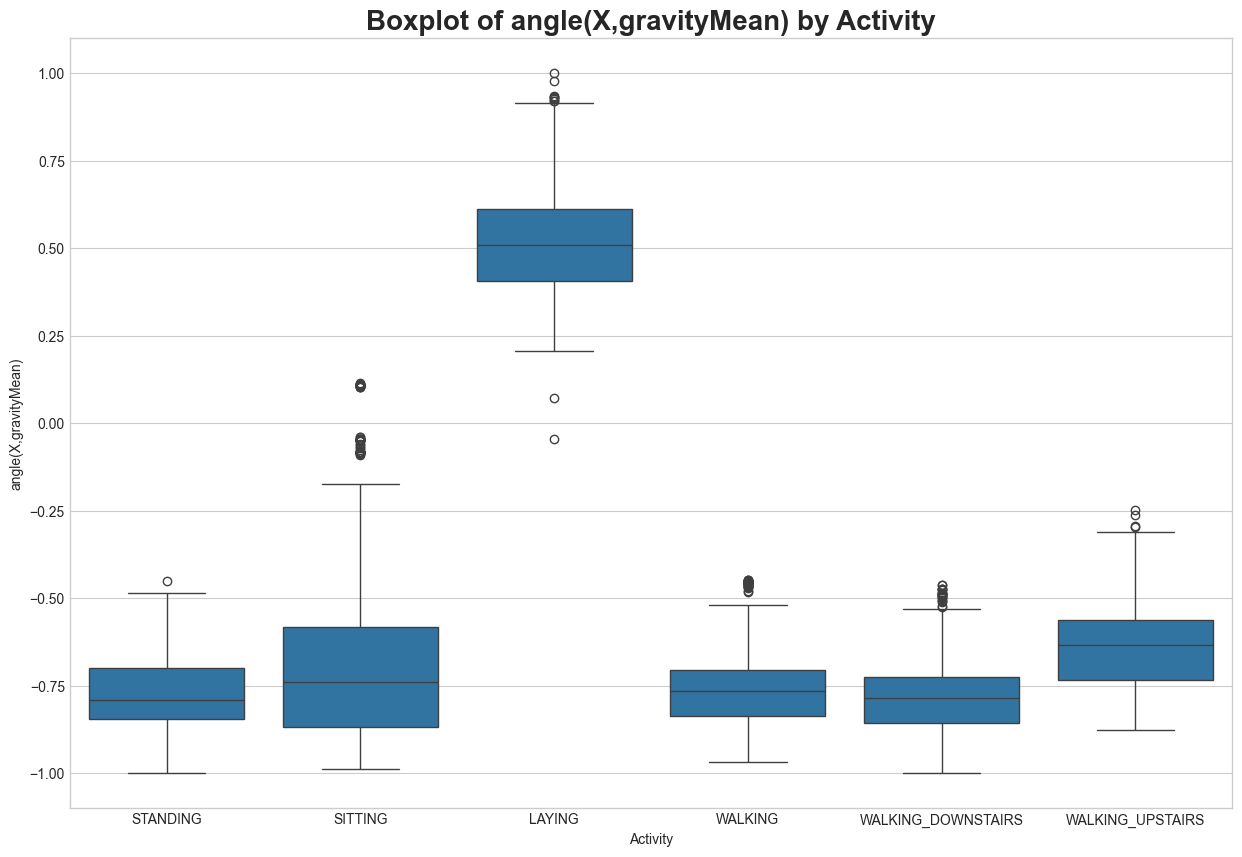

In [23]:
# ^⨀ᴥ⨀^ your code here

plt.figure(figsize=(15, 10))
sns.boxplot(data=train, x='Activity', y='angle(X,gravityMean)')
plt.title("Boxplot of angle(X,gravityMean) by Activity", size=20, weight="heavy")


Заметим, что активность "лежание" имеет наибольший угол по сравнению с другими активностями, поскольку это связано непосредственно с положением тела в пространстве. Те если все други активности выполняются в почти вертикальном положении тела, то лежании наоборот из-за чего угол меняется.

### Задание 11 (0.5 балла)

Посмотрим теперь на `tBodyAcc-max()-X`. Визуализируйте скрипичные диаграммы для этого признака с разделением по активностям на всем train. Кажется логичным, что максимальное ускорение в моменте для разных активностей будет различаться. Однако есть ли активность, которая будет выделяться? Если да, то предложите объяснение, почему эта активность выделяется.

Вам может пригодиться:
- sns.violinplot

Text(0.5, 1.0, 'Violin plot of tBodyAcc-max()-X by Activity')

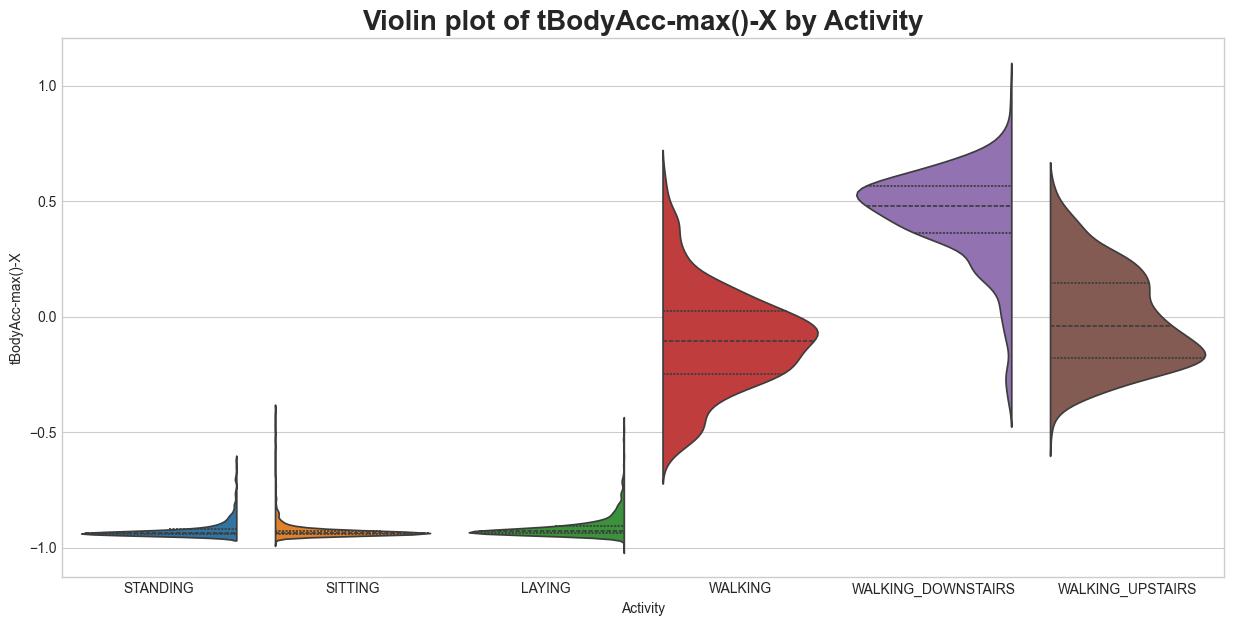

In [24]:
# ( ͡☉ ͜ʖ ͡☉) your code here
fig, ax = plt.subplots(figsize=(15, 7))
sns.violinplot(data=train, x="Activity", hue="Activity", y="tBodyAcc-max()-X", split=True, inner="quart", ax=ax)
plt.title("Violin plot of tBodyAcc-max()-X by Activity", size=20, weight="heavy")


Мы можем заметить, что выделяется такой вид активности, как "ходьба". Неудивительно, что "ходьба" будет иметь большее маскимальное ускорение в мометне нежели, другие более статические виды активностей.
Также можно сказать, что максимальное ускорение из всех активностей показывает `WALKING_DOWNSTAIRS`, это связано с тем, что спуск занимает у человека меньше энергии, позволяя ему быстрее двигаться.


### Задание 12 (1 балл)

Вы уже можете с довольно хорошим качеством выделить две категории активности из шести. Продолжим.

Ранее уже упоминалось разделение на две группы активностей: статические и динамические. Пришла пора разделить датасет train на две части. Сделайте это! Теперь на одной картинке покажите распределения `fBodyAcc-bandsEnergy()-1,8.2` для динамичных активностей (`boxenplot` - немного измененый "ящик с усами") и `angle(Y,gravityMean)` для статических - тут хватит и простой гистограммы (прямо, как в примере ниже). Можно ли выделить еще какие-то активности? Если да, напишите, какие активности на 1 и 2 графиках выделяются.

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec (заметили, что один график больше другого? попробуйте сами так сделать - вам понравится...)
- sns.boxenplot
- sns.histplot

In [26]:
# ‿( ́ ̵ _-`)‿ your code here
static = train_copy[train_copy['ActivityType'] == 'Static']
static.sample(5)

,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,subject,Activity,ActivityType,PredActivityType
1169,-0.975416,-0.972568,0.987835,-0.941367,-0.998861,-0.833758,0.209690,0.046605,-0.513175,6,STANDING,Static,Static
3113,-0.991814,-0.989333,0.924771,-0.942694,-0.999319,-0.670223,0.195394,-0.196059,-0.505383,16,SITTING,Static,Static
5577,-0.989447,-0.993241,-0.646966,-0.932722,-0.999826,0.750093,-0.573520,-0.412091,0.587838,26,LAYING,Static,Static
1499,-0.982041,-0.991551,0.988714,-0.938188,-0.998884,-0.869209,0.154936,-0.056110,-0.605704,7,STANDING,Static,Static
6356,-0.984837,-0.985882,-0.230265,-0.938842,-0.999707,0.447129,-0.321622,-0.676759,-0.008121,28,LAYING,Static,Static


In [27]:
dynamic = train_copy[train_copy['ActivityType'] == 'Dynamic']
dynamic.sample(5)

,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,subject,Activity,ActivityType,PredActivityType
771,-0.253011,-0.393662,0.993276,-0.388927,-0.873070,-0.929506,0.144301,0.034713,-0.083253,5,WALKING,Dynamic,Dynamic
5216,-0.244731,-0.523935,0.897220,-0.264101,-0.817114,-0.665504,0.112096,-0.223708,0.618183,25,WALKING_DOWNSTAIRS,Dynamic,Dynamic
1118,0.375975,-0.150442,0.916585,0.597743,-0.947863,-0.804729,0.231711,0.037917,-0.165721,6,WALKING_DOWNSTAIRS,Dynamic,Dynamic
4110,-0.172978,-0.303114,0.873009,-0.109638,-0.753805,-0.571664,0.344024,0.182165,-0.207963,21,WALKING,Dynamic,Dynamic
5422,-0.189985,-0.532191,0.977038,0.331646,-0.890912,-0.890253,0.131133,-0.054411,0.344503,25,WALKING_DOWNSTAIRS,Dynamic,Dynamic


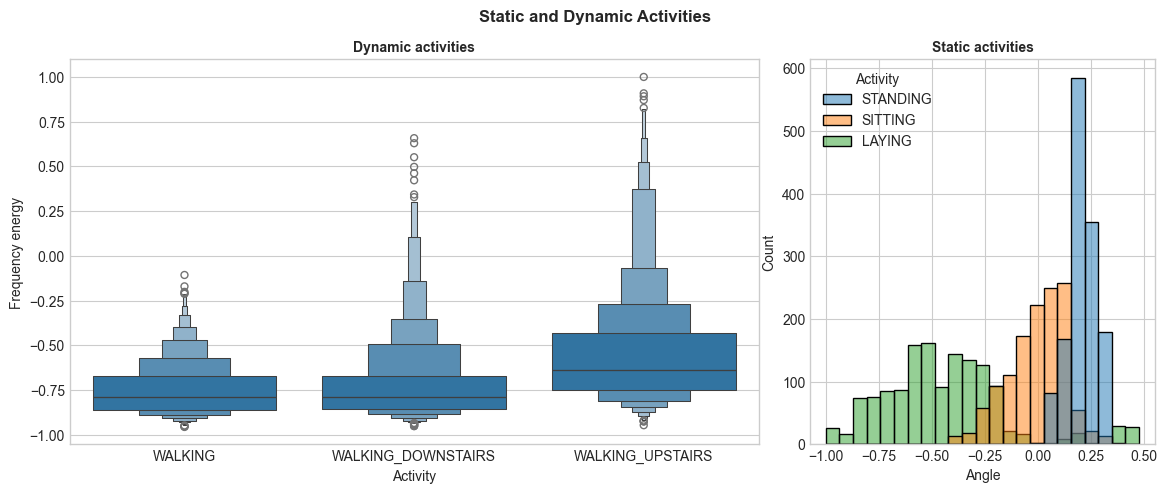

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), gridspec_kw={'wspace': 0.1},width_ratios=(2, 1))
fig.suptitle('Static and Dynamic Activities', fontweight='bold')

sns.boxenplot(dynamic, x='Activity', y='fBodyAcc-bandsEnergy()-1,8.2', ax=ax1)
ax1.set_ylabel("Frequency energy")
ax1.set_title("Dynamic activities", size=10, weight="heavy")

sns.histplot(static, x="angle(Y,gravityMean)", hue="Activity", ax=ax2)
ax2.set_xlabel("Angle")
ax2.set_title("Static activities", size=10, weight="heavy");

На первом графике заметно выделяется активность `WALKING_UPSTAIRS`: её медианное значение энергии ускорения тела в заданном диапазоне частот является наибольшим среди всех динамических активностей. Кроме того, распределение значений для `WALKING_UPSTAIRS` охватывает более широкий интервал по сравнению с `WALKING` и `WALKING_DOWNSTAIRS`.

Для статических активностей обращает на себя внимание `STANDING`: стандартное отклонение угла между осью Y и вектором гравитационного ускорения у этой активности меньше, чем у других в той же категории. Иными словами, значения угла при `STANDING` менее вариативны и сосредоточены в более узком диапазоне.

### Задание 13 (0.5 балла)

Не всегда жизнь будет такой легкой, а данные будут полностью или почти линейно разделимы в одному признаку (иначе чем бы занимались дата саентисты...). Часто данные вообще ни по одному признаку нельзя адекватно разделить (да и по комбинациям признаков тоже). Давайте попробуем взять не один признак, а целых два!

Рассмотрим только статические активности. Будет снова два графика сразу. На первом графике будет боксплот распределения `fBodyAcc-skewness()-X` по активностям. А на втором попробуем взять не все наблюдения данной группы активностей, а только их часть. Разделимы ли категории по `fBodyAcc-skewness()-X`? А если взять только те строки, где `fBodyAcc-skewness()-X < -0.376`, и теперь вывести боксплот распределения `angle(Y,gravityMean)` по разным активностям? Попробуйте и напишите, выделилась ли какая-то категория?

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.boxplot

Text(0.5, 1.0, 'Angle between Y-axis and gravity acceleration over activities')

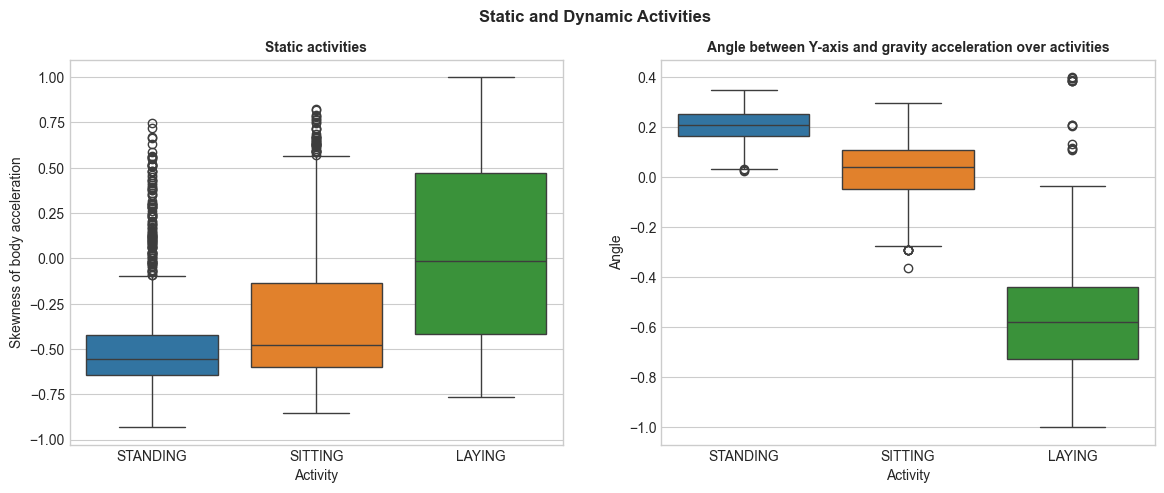

In [46]:
# (ಠ_ಠ) your code here
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), gridspec_kw={'wspace': 0.2})
fig.suptitle('Static and Dynamic Activities', fontweight='bold')

sns.boxplot(static, x='Activity', y='fBodyAcc-skewness()-X', ax=ax1, hue="Activity")
ax1.set_title("Static activities", size=10, weight="heavy")
ax1.set_ylabel("Skewness of body acceleration")

sns.boxplot(static[static['fBodyAcc-skewness()-X'] < -0.376], x='Activity', y='angle(Y,gravityMean)', ax=ax2, hue="Activity")
ax2.set_ylabel("Angle")
ax2.set_title("Angle between Y-axis and gravity acceleration over activities", size=10, weight="heavy")

По первому графику нельзя точно что-либо сказать, поскольку большая часть значений по каждой из активностей пересекаются, то есть отдельно по `Skewness` никакую статическую активность выделить не получится.

Однако при ограничении на `Skewness` с порогом $-0.376$ и рассмотрении другого признака получается отделить графики друг от друга, что дает нам возможность отделить активность `SITTING`, медианное значение которой $\approx 0$.

Таким образом, остается только научиться определять `WALKING`.

Поздравляем, теперь вы на шажок ближе к тому, чтобы стать решающим деревом!

### Задание 14 (1 балл)

Вот и осталась лишь одна активность, которую мы никак не выделили. Попробуем и ее какими-то порогами отделить от всех остальных. Да, можно было бы сказать, что, раз уж мы выделили 5 из 6 категорий, то все остальное - это и есть последняя категория, но мы не идем легкими путями. Выделить оставшуюсь категорию с хорошим качеством не так уж и просто. Из доступных признаков, сначала посмотрите на распределение `tBodyAcc-max()-X` на динамических активностях (скрипичная диаграмма отлично подойдет).

А теперь спускаем вам порог `tBodyAcc-max()-X < 0.157`. Для таких строк постройте диаграмму рассеяния для признака `tGravityAcc-min()-X`. Да, получается неидеально, но это честная работа. Можно выбрать порог так, чтобы чисто из таблицы с динамическими активностями из строк, где `tBodyAcc-max()-X < 0.157`, выбрать по некоторому порогу для `tGravityAcc-min()-X` строки так, чтобы доля правильных ответов на оставшейся категории была не меньше 83%!

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.violinplot
- sns.swarmplot (иногда лучше подходит, чем просто sns.scatterplot)

Обратите внимание, что подписи к осям можно убирать методами plt. Например, если у вас общее название для оси Y для обоих графиков, то можно не подписывать ось Y у второго графика.

Text(729.276515151515, 0.5, '')

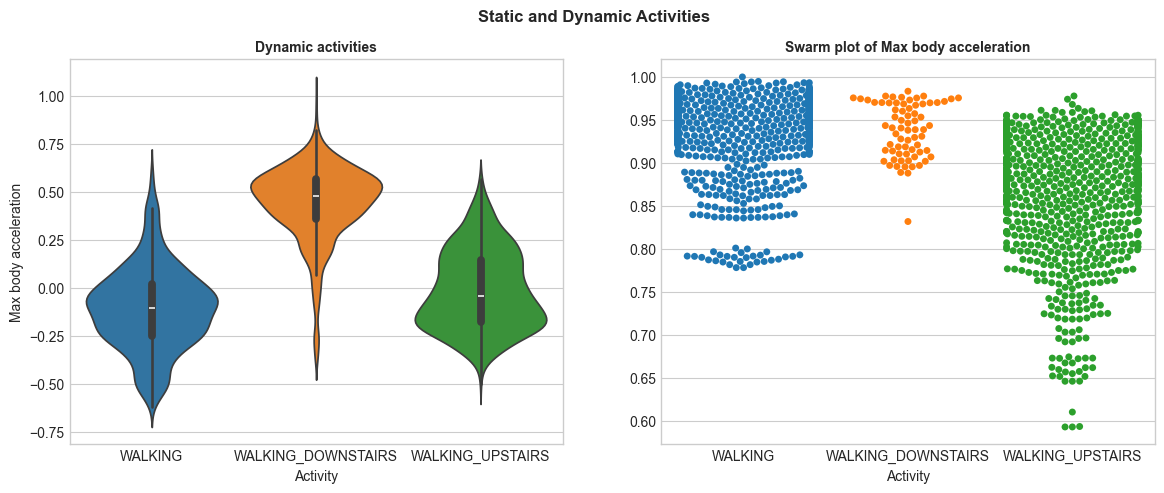

In [51]:
# (✖╭╮✖) your code here
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), gridspec_kw={'wspace': 0.2})
fig.suptitle('Static and Dynamic Activities', fontweight='bold')

sns.violinplot(dynamic, x='Activity', y='tBodyAcc-max()-X', ax=ax1, hue="Activity")
ax1.set_title("Dynamic activities", size=10, weight="heavy")
ax1.set_ylabel("Max body acceleration")

sns.swarmplot(dynamic[dynamic['tBodyAcc-max()-X'] < 0.157], x='Activity', y='tGravityAcc-min()-X', ax=ax2, hue="Activity")
ax2.set_title("Swarm plot of Max body acceleration", size=10, weight="heavy")
ax2.set_ylabel("")

По первому графику нельзя что-то конкретное выделить, но можно сказать, что возможно исключить из рассмотрения 1 из динамических активностей, а именно, `WALKING_UPSTAIRS`.

Теперь можно отделить WALKING от WALKING_UPSTAIRS, например, по той же медиане, которая у WALKING больше.

### Задание 15 (0.5 балла)

Теперь попробуем более интерактивные графики. Установите библиотеку `plotly` (обычно `pip install plotly` или `conda install plotly`). Синтаксис очень похож на `seaborn`, но вот [документация для plotly.express](https://plotly.com/python-api-reference/plotly.express.html).

Сначала подготовим данные для визуализации. Будем считать t-SNE просто "черным ящиком", который принимает наши данные и проецирует их в двумерное или трехмерное пространство. Возможно, придется немного подождать.

In [63]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    train['Activity']
], axis=1)

CPU times: user 2min 53s, sys: 1min 12s, total: 4min 6s
Wall time: 24.5 s


In [64]:
!pip install plotly

Теперь нарисуйте scatter-график через `plotly.express` для `df_2_comp` с выделением цветами активностей. Красиво получилось? Видны скопления точек одного цвета? Можно разные активности отделить линиями на данном графике?

In [65]:
# ʅ(◔౪◔ ) ʃ your code here
df_2_comp

,x,y,Activity
0,-26.246426,-20.894899,STANDING
1,22.021082,-71.272324,STANDING
2,23.519499,-70.619492,STANDING
3,13.588206,-69.014694,STANDING
4,20.129253,-70.024078,STANDING
...,...,...,...
7347,45.883160,30.178551,WALKING_UPSTAIRS
7348,48.120300,30.973463,WALKING_UPSTAIRS
7349,50.292255,34.285526,WALKING_UPSTAIRS
7350,50.237274,34.271633,WALKING_UPSTAIRS


In [66]:
import plotly.express as px
px.scatter(df_2_comp, x='x', y='y', color='Activity', title='2d Activities')

In [68]:
df_3_comp

,x,y,z,Activity
0,-4.950462,-9.006090,9.443770,STANDING
1,1.309547,-13.580747,-12.005022,STANDING
2,2.128736,-14.166993,-12.534444,STANDING
3,-1.381198,-12.122625,-7.997423,STANDING
4,0.776184,-13.694817,-11.247991,STANDING
...,...,...,...,...
7347,17.794106,7.675497,4.884124,WALKING_UPSTAIRS
7348,17.835554,7.192106,6.452561,WALKING_UPSTAIRS
7349,17.192474,8.988441,8.857964,WALKING_UPSTAIRS
7350,17.179857,8.990412,8.805197,WALKING_UPSTAIRS


Мы не отстаем от трендов и тоже можем в 3D. Сейчас и вы научитесь (если еще не умеете). Нарисуйте scatter_3d-график через `plotly.express` для `df_3_comp` с выделением цветами активностей. Повращайте его. Нормально получилось? Есть ли какая-то структура у точек?

In [69]:
# (✧≖‿ゝ≖) your code here
px.scatter_3d(df_3_comp, x='x', y='y', z='z', color='Activity', title='3d Activities')

Я в шоке, я ошарашен

### Задание 16 (1 балл)

Мы сделали вам fit. Ваша очередь сделать predict. Допишите функцию, которая принимает на вход датафрейм с признаками, а выдает вектор из предсказаний - для каждой строки датафрейма вы определяете, к какому классу принадлежит объект. Рекомендуем сразу записывать из строками, а не кодировать в числа. Дальше фукнция `accuracy_score` выдаст вам долю правильных ответов.

Подсказка: вы уже отделили категории друг от друга по каким-то признакам. Воспользуйтесь этим знанием! Используя только проведенный вами анализ можно спокойно выбить не менее 75% на train и test! Если вы получите меньше 75%, то балл будет снижен. Авторское решение (на основе всех графиков выше) выбивает 81% и 77% на train и test соответственно. [Шпаргалка с готовыми идеями для такой задачи](https://rutube.ru/video/f884aa6ed5f94120b7304506042fe5bb/)

In [74]:
def mapping(row: pd.Series) -> str:
    if row["tBodyAccMag-mean()"] < -0.6:    # if static
        if row["angle(X,gravityMean)"] > 0:
            return "LAYING"
        if row["fBodyAcc-skewness()-X"] < -0.376 and -0.1 <= row["angle(Y,gravityMean)"] <= 0.1:
            return "SITTING"
        if row["angle(Y,gravityMean)"] > 0:
            return "STANDING"
        return "SITTING"
    else:                                   # if dynamic
        if row["tBodyAcc-max()-X"] > 0.21:
            return "WALKING_DOWNSTAIRS"
        if row['fBodyAcc-bandsEnergy()-1,8.2'] >= -0.75:
            return "WALKING_UPSTAIRS"
        return 'WALKING'
        
        

def predict(df: pd.DataFrame) -> pd.Series:
    temp_df = df.apply(mapping, axis=1)
    return temp_df

def accuracy_score(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()

In [75]:
train_preds = predict(train)
test_preds = predict(test)
print(f"Accuracy on train set => {accuracy_score(train['Activity'], train_preds)}")
print(f"Accuracy on test set => {accuracy_score(test['Activity'], test_preds)}")

Accuracy on train set => 0.7724428726877041
Accuracy on test set => 0.7614523243976926


__Место для мема и/или фидбэка__

> тут